### IMPORT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

### VERİ YÜKLEME 

In [5]:
df = pd.read_csv("C:\\Users\\merve\\Desktop\\staj_lotus_ai\\EtSut_ML_Projects\\02_clustering_dairy_segmentation\\data\\dairy_dataset.csv")

In [6]:
df.head()   

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


### KEŞİFÇİ VERİ ANALİZİ

In [7]:
df.isnull().sum()


Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Land Area (acres),4325.0,503.483073,285.935061,10.1700,252.9500,509.1700,751.250,999.5300
Number of Cows,4325.0,54.963699,26.111487,10.0000,32.0000,55.0000,77.000,100.0000
Product ID,4325.0,5.509595,2.842979,1.0000,3.0000,6.0000,8.000,10.0000
Quantity (liters/kg),4325.0,500.652657,288.975915,1.1700,254.1700,497.5500,749.780,999.9300
Price per Unit,4325.0,54.785938,26.002815,10.0300,32.4600,54.4000,77.460,99.9900
Total Value,4325.0,27357.845411,21621.051594,42.5165,9946.8145,21869.6529,40954.441,99036.3696
Shelf Life (days),4325.0,29.127630,30.272114,1.0000,10.0000,22.0000,30.000,150.0000
Quantity Sold (liters/kg),4325.0,248.095029,217.024182,1.0000,69.0000,189.0000,374.000,960.0000
Price per Unit (sold),4325.0,54.779140,26.192790,5.2100,32.6400,54.1400,77.460,104.5100
Approx. Total Revenue(INR),4325.0,13580.265401,14617.009122,12.5400,2916.6500,8394.5400,19504.550,89108.9000


müşteri bazlı ilerliyoruz ve müşterilerin durumuna göre kümeliyoruz 

In [10]:
# Özellik seçimi (KNIME'da yaptığımız gibi)
features = ['Quantity Sold (liters/kg)', 'Price per Unit (sold)', 'Approx. Total Revenue(INR)']
X = df[features]

### AYKIRI DEĞER TEMİZLİĞİ

In [14]:
#Adım 6: Aykırı gözlem var mı inceleyiniz.
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [16]:
for col in features:
      print(col, check_outlier(X, col))

Quantity Sold (liters/kg) False
Price per Unit (sold) False
Approx. Total Revenue(INR) False


### NORMALİZASYON

In [12]:
# Normalizasyon (Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

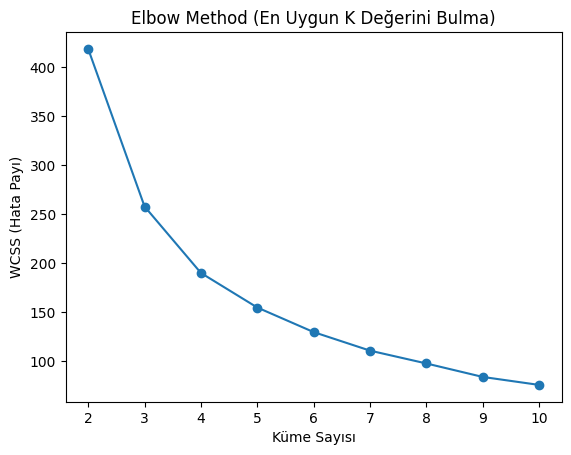

In [17]:
wcss = []
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Dirsek Yöntemi Görselleştirme
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method (En Uygun K Değerini Bulma)')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS (Hata Payı)')
plt.show()

In [21]:
# 1. Model: K-Means (Seçilen k=3)
kmeans_final = KMeans(n_clusters=2, random_state=42)
df_final = X.copy()
df_final['KMeans_Cluster'] = kmeans_final.fit_predict(X_scaled)

# 2. Model: Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
df_final['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Başarı Skorlarını Yazdırma
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_final.labels_)}")
print(f"Hierarchical Silhouette Score: {silhouette_score(X_scaled, df_final['Hierarchical_Cluster'])}")

K-Means Silhouette Score: 0.409888805234953
Hierarchical Silhouette Score: 0.39996226911250216


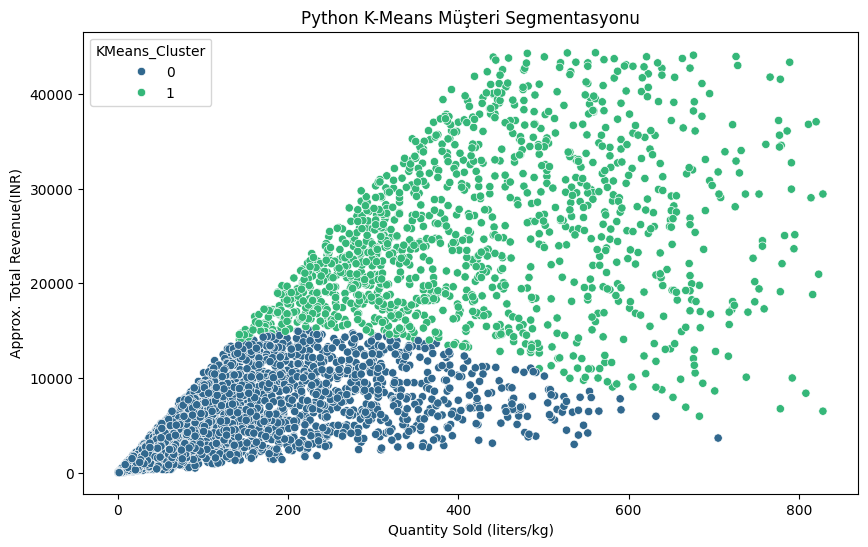

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_final, x='Quantity Sold (liters/kg)', y='Approx. Total Revenue(INR)', 
                hue='KMeans_Cluster', palette='viridis')
plt.title('Python K-Means Müşteri Segmentasyonu')
plt.show()